# What's Next in Python?

Python skill building needs to start with learning for loop, while loops, and more intuitive constructs.  As one develops confidence with those, there comes a point when faster, more succinct methods of writing cod should be learned.  That is much of what is presented in this notebook, including these:

- <a href=#*>The <font style="font-family:'Courier New">*</font> operator</a>
- <a href=#filter><font style="font-family:'Courier New">filter</font> function</a>
- <a href=#zip><font style="font-family:'Courier New">zip</font> function</a>
- <a href=#enumerate><font style="font-family:'Courier New">enumerate</font></a>
- <a href=#map><font style="font-family:'Courier New">map</font> function</a>
- <a href=#generators>Generators
- <a href=#reduce><font style="font-family:'Courier New">reduce</font> function

Writing more robust, flexible code should be a coder's goal, and here is one method toward that end:

- <a href=#args><font style="font-family:'Courier New">\*args</font>, <font style="font-family:'Courier New">\*\*kwargs</font></a>

Writing faster and more memory-efficient code is also a coder's goal.  Here are some tools to help with that:

- <a href=#*><font style="font-family:'Courier New">timeit</font></a>
- <a href=#*>line_profiler</a>
- <a href=#*>memory_profiler</a>

In addition, here are some techniques that I use frequently taht save a lot of time and/or help my code to be more easily read:

- <a href=#*>String substitution</a>
- <a href=#*><font style="font-family:'Courier New">os.walk()</font></a>
- <a href=#*><font style="font-family:'Courier New">glob</font></a>

Perhaps for another day, but one important advanced topic are:

- <a href=#*>Function decorators</a>
- <a href=#*>Function docs</a>

# The <font style="font-family:'Courier New">*</font> Operator <a name='*' />

<font style="font-family:'Courier New">*</font> is not just for multiplication.  It also is an "unpacking" operator, as in unpacking elements from tuples, lists, generators, and similar objects.

It is useful (in one instance) when data naturally are grouped in tuples and lists, but need to be sent individually to functions.  Below are two examples, one with the <font style="font-family:'Courier New">*</font> and one with.  Without it, you need to use indices to access the elements.  In the latter, more readable and shorter code, you don't.

In [1]:
def distance(x0, y0, x1, y1):
    return ((x1 - x0)**2 + (y1 - y0)**2)**0.5

In [4]:
p0 = (1,2)
p1 = (4,6)

In [5]:
print(distance(p0[0], p0[1], p1[0], p1[1]))

5.0


In [7]:
print(distance(*p0,*p1))

5.0


# Packing up function arguments: <font style="font-family:'Courier New">\*args</font>, <font style="font-family:'Courier New">\*\*kwargs</font>

Functions have position arguments and named arguments, or keyword arguments.  In this function definition, <font style="font-family:'Courier New">x</font> and <font style="font-family:'Courier New">y</font> are positional arguments and <font style="font-family:'Courier New">name</font> is a named argument.

```
def my_f(x, y, name = 'Scott'):
    ...
    return
```

A function call must have at least two arguments that will be interpreted, in this order, as <font style="font-family:'Courier New">x</font> and <font style="font-family:'Courier New">y</font>.  The named argument <font style="font-family:'Courier New">name</font> is not required in this case as it has a default value defined.

what if you need a function to be flexible in terms of how many and, perhaps, what types of arguments are provided?  Enter <font style="font-family:'Courier New">\*args</font>, <font style="font-family:'Courier New">\*\*kwargs</font>.

In [96]:
def find_args(*args, **kwargs):
    print('Positional arguments are:', [a for a in args])
    print('Keyword arguments are:', {k:v for k,v in kwargs.items()})
    return 'Done'

In [97]:
print(find_args(1, 3, 5, name = 'Scott', col = 'Movie'))

Positional arguments are: [1, 3, 5]
Keyword arguments are: {'name': 'Scott', 'col': 'Movie'}
Done


In [99]:
import pandas as pd
df = pd.read_csv('netflix_titles.csv')

df_filter = df[df['type'] == 'Movie']
df_filter = df_filter[(df_filter['rating'] == 'PG') | (df_filter['rating'] == 'PG-13')]
result = df_filter['release_year'].value_counts()
result.sort_index(ascending = True, inplace = True)
print(result)

1955     1
1965     1
1968     1
1973     1
1974     1
1975     1
1976     3
1978     1
1979     2
1980     1
1981     1
1982     2
1984     4
1985     1
1986     1
1987     1
1988     2
1989     3
1990     3
1991     3
1992     3
1993     5
1994     3
1995     6
1996     4
1997     9
1998     5
1999     6
2000    10
2001     6
2002    14
2003    12
2004    11
2005    15
2006    17
2007    20
2008    26
2009    23
2010    18
2011    23
2012     8
2013    17
2014    19
2015    27
2016    30
2017    33
2018    48
2019    17
Name: release_year, dtype: int64


## Netflix <font style="font-family:'Courier New">DataFrame</font> Flexible Filtering Function

In [121]:
def net_filt(df, *args, **kwargs):
    
    '''
    - keywords of kwargs are considered column name and values lists 
      of column values by which the rows are to be filtered
    - elements in values iterables are interpreted as OR conditions
    - conditions for multipple columns are considered as AND conditions
    - df is a pandas DataFrame
    '''
    
    conds = []
    for k,v in kwargs.items():
        cond = np.empty(df.shape[0]).astype(np.bool)
        cond.fill(False)
        for e in v:
            cond = cond | (df[k] == e)
        conds.append(cond)
        
        cond = np.empty(df.shape[0]).astype(np.bool)
        cond.fill(True)
        for c in conds:
            cond = cond & c
        
    return df[cond]

In [122]:
df_r = net_filt(df, rating = ['PG', 'PG-13'], type = ['Movie'])
result = df_r['release_year'].value_counts()
result.sort_index(ascending = True)

1955     1
1965     1
1968     1
1973     1
1974     1
1975     1
1976     3
1978     1
1979     2
1980     1
1981     1
1982     2
1984     4
1985     1
1986     1
1987     1
1988     2
1989     3
1990     3
1991     3
1992     3
1993     5
1994     3
1995     6
1996     4
1997     9
1998     5
1999     6
2000    10
2001     6
2002    14
2003    12
2004    11
2005    15
2006    17
2007    20
2008    26
2009    23
2010    18
2011    23
2012     8
2013    17
2014    19
2015    27
2016    30
2017    33
2018    48
2019    17
Name: release_year, dtype: int64

# <font style="font-family:'Courier New">map</font> Function <a name='map' />

The <font style="font-family:'Courier New">map</font> function applies a function to a series of arguments.

The function can be a built-in Python function, a custom function, a numpy function, a lambda function and more.

The arguments to which the function is applied need to be in the form of an iterable.

In [8]:
result = map(lambda x: x**2, range(9))
print('map() creates a map object:', result)

map() creates a map object: <map object at 0x00000265FBE39E80>


Note that the map function creates a map object.  We can't print it directly, but we can unpack it and print it or we can unpack it and put it in a list.

In [9]:
result = map(lambda x: x**2, range(9))
result = list(result)
print(result)

[0, 1, 4, 9, 16, 25, 36, 49, 64]


In [10]:
result = map(lambda x: x**2, range(9))
result = [*result]
print(result)

[0, 1, 4, 9, 16, 25, 36, 49, 64]


## Other <font style="font-family:'Courier New">map</font> examples

In [14]:
def add1(x):
    return x + 1

In [13]:
import math
[*map(math.sqrt, [0, 1, 4, 9, 16, 25])]

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]

In [15]:
[*map(add1, (1,3,5,7))]

[2, 4, 6, 8]

In [26]:
import numpy as np
[*map(lambda a, b: np.linalg.norm(a - b), np.array([[0,0], [1,1]]), np.array([[2,2], [3,3]]))]

[2.8284271247461903, 2.8284271247461903]

## <font style="font-family:'Courier New">starmap</font>

This is a derivative of the <font style="font-family:'Courier New">map</font> function and it unpacks the multi-element arguments within the iterable (as in the <font style="font-family:'Courier New">*</font> operator).

In [148]:
from itertools import starmap

args = [(1,1), (2,2), (3,3)]
result = starmap(pow, args)
print(*result)

1 4 27


# <font style="font-family:'Courier New">zip</font> Function <a name='zip' />

The <font style="font-family:'Courier New">zip</font> function "packages" multiple iterables by iterating through them simultaneously and grouping elements from the different iterators by index.

In [27]:
names = ('Joe', 'Jolene', 'Joellen', 'Joel')
ages = (22, 27,32, 29)

print(zip(names, ages))

Just like the <font style="font-family:'Courier New">map</font> function, <font style="font-family:'Courier New">zip</font> returns an object.  We need to convert it to another form to print it.

In [28]:
[*zip(names, ages)]

[('Joe', 22), ('Jolene', 27), ('Joellen', 32), ('Joel', 29)]

In [30]:
names = ['Joe', 'Jolene', 'Joellen', 'Joel']
ages = [22, 27,32, 29]
ids = [9301, 9305, 9307, 9309]
[*zip(names, ages, ids)]

[('Joe', 22, 9301),
 ('Jolene', 27, 9305),
 ('Joellen', 32, 9307),
 ('Joel', 29, 9309)]

What is happening here?

In [31]:
[*zip(*zip(names, ages, ids))]

[('Joe', 'Jolene', 'Joellen', 'Joel'),
 (22, 27, 32, 29),
 (9301, 9305, 9307, 9309)]

### <font style="font-family:'Courier New">zip</font> Applications

The first example is transforming data given in <font style="font-family:'Courier New">xy</font> coordinates into an <font style="font-family:'Courier New">x</font>-series and <font style="font-family:'Courier New">y</font>-series for plotting.

In [131]:
xy = [[0,0], [1,2], [2,3], [3,3],[4,2], [5,7]]

In [135]:
x, y = zip(*xy)

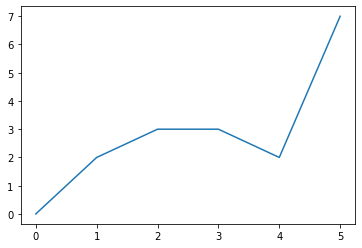

In [138]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()

Preparing data for a call to the <font style="font-family:'Courier New">map()</font> function.

In [142]:
xyz = [(1,1,2), (2,1,4), (3,2,1), (4,1,2)]
x, y, z = zip(*xyz)

In [143]:
[*map(lambda x,y,z: 2.1*x + 0.75*y + 1.1*z, x, y, z)]

[5.050000000000001, 9.350000000000001, 8.9, 11.350000000000001]

# <font style="font-family:'Courier New">enumerate</font> <a name='enumerate' />

The <font style="font-family:'Courier New">enumerate</font> function iterates through an iterable while augmenting the iteration with an index.

In [33]:
for i, name in enumerate(names):
    print(i, name)

0 Joe
1 Jolene
2 Joellen
3 Joel


In [34]:
enumerate(names)

In [35]:
[*enumerate(names)]

[(0, 'Joe'), (1, 'Jolene'), (2, 'Joellen'), (3, 'Joel')]

One of the circumstances when you might want an index is to create a dictionary from a list of data, like this:

In [37]:
dicNames = {*enumerate(names)}
dicNames

{(0, 'Joe'), (1, 'Jolene'), (2, 'Joellen'), (3, 'Joel')}

# <font style="font-family:'Courier New">filter</font> Function <a name='filter' />

The <font style="font-family:'Courier New">filter</font> function filters data, returning only the data meeting specified criteria in the form of a function that returns a Boolean value. The criteria[ion] are[is] specified first, and then the iterable to which to apply the condition.

In [38]:
result = filter(lambda x: x % 2 == 0, [0, 1, 2, 3])
result

Again an object is return that must be unpacked to view.

In [39]:
[*result]

[0, 2]

In [40]:
def big(x):
  return x > 100

In [44]:
result = filter(big, range(90, 111, 2))
[*result]

[102, 104, 106, 108, 110]

# Generators <a name='generators' />

The objects returned by <font style="font-family:'Courier New">map</font>, <font style="font-family:'Courier New">filter</font>, <font style="font-family:'Courier New">zip</font>, and <font style="font-family:'Courier New">enumerate</font> are _generators_ which is why we needed to "unpack" them before printing them.  

Generators are functions that generate a sequence of values one at a time.  The <font style="font-family:'Courier New">map</font>, <font style="font-family:'Courier New">filter</font>, and <font style="font-family:'Courier New">zip</font> do not construct an entire result immediately but rather wait for a code statemeent to be executed to get the next value.

* This way incredibly long sequences of values are available although they are not immediately created and by so doing taking up a lot of memory.
* It makes it possible to work with large quantities of data without crashing your machine.

In [50]:
def my_gen(x=0):
    while x <= 10:
        yield x
        x += 1

In [51]:
[y for y in my_gen()]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [54]:
gene = (my_gen())
print(next(gene))
print(next(gene))
print(next(gene))
print(next(gene))

0
1
2
3


Generators can be constructed with parentheses and statements looking sometimes like list comprehension.

In [59]:
my_gen1 = (y for y in my_gen())
print(next(my_gen1))
print(next(my_gen1))

0
1


In [55]:
for y in my_gen(3):
    print(y)

3
4
5
6
7
8
9
10


__DO NOT EXECUTE THIS NEXT CELL!!!__ What do you think would hapen if you did?

In [ ]:
my_list = []
for i in range(999999999999999999999999999999999999999999999999999999999999999999999):
    my_list.append(i)

Can you execute the cell below?

In [57]:
big_gen = (y for y in range(999999999999999999999999999999999999999999999999999999999999999999999))
print(next(big_gen))
print(next(big_gen))
print(next(big_gen))
print(next(big_gen))
print(next(big_gen))
print(next(big_gen))
print(next(big_gen))
print(next(big_gen))
print(next(big_gen))

0
1
2
3
4
5
6
7
8


# Iterators

Content to be added soon!

# <font style="font-family:'Courier New">reduce</font> Function <a name='reduce' />

The <font style="font-family:'Courier New">reduce</font> function applies a function to a sequence of elements and returns one value.

In the case below, each sequential pair of elements are multiplied and then multiplied by the preceeding running multiple.

In [65]:
from functools import reduce

x = range(1, 7)
print(reduce(lambda y, z: y*z, x))

720


In [145]:
z = np.array([[True, False, False, True], [True, True, False, False], [False, False, False, False]])
reduce(lambda x,y: x|y, z)

array([ True,  True, False,  True])

# Code Performance: Speed and Memory Consumption

Writing code that can be executed faster and that uses less memory makes the code feasible to run and more useful because insights are obtained more quickly.

## <font style="font-family:'Courier New">timeit</font> <a name='timeit' />

The <font style="font-family:'Courier New">timeit</font> utility will execute a code snippet multiple times and give you the mean execution time and standard deviation as well.

- <font style="font-family:'Courier New">%timeit</font> analyzes one statement 
- <font style="font-family:'Courier New">%%timeit</font> analyzes one cell 

In [69]:
%%timeit
new_list = []
for i in range(10):
    new_list.append(i)

1.04 µs ± 47.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [66]:
%timeit x = [i for i in range(10)]

745 ns ± 27.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [10]:
%timeit y = (i for i in range(10))

529 ns ± 23.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
%%timeit 
y = (i for i in range(10))
y = list(y)

In [82]:
p0 = [[10, 10], [9, 9], [8, 8], [7, 7], [6, 6]]
p1 = [[0,0], [1,1], [2,2], [3,3], [4,4]]
dist = []
for i in range(len(p0)):
    dist.append(((p0[i][0] - p1[i][0])**2 + (p0[i][1] - p1[i][1])**2)**0.5)
dist

[14.142135623730951,
 11.313708498984761,
 8.48528137423857,
 5.656854249492381,
 2.8284271247461903]

In [152]:
%%timeit
p0 = [[10, 10], [9, 9], [8, 8], [7, 7], [6, 6]]
p1 = [[0,0], [1,1], [2,2], [3,3], [4,4]]
dist = []
for i in range(len(p0)):
    dist.append(((p0[i][0] - p1[i][0])**2 + (p0[i][1] - p1[i][1])**2)**0.5)
dist

5.72 µs ± 710 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [153]:
%%timeit
p0 = [[10, 10], [9, 9], [8, 8], [7, 7], [6, 6]]
p1 = [[0,0], [1,1], [2,2], [3,3], [4,4]]
[*map(lambda p,q:((p[0] - q[0])**2 + (p[1] - q[1])**2)**0.5 , p0, p1)] # 

5.3 µs ± 488 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [76]:
p0 = [[10, 10], [9, 9], [8, 8], [7, 7], [6, 6]]
p1 = [[0,0], [1,1], [2,2], [3,3], [4,4]]
[*map(lambda p,q:((p[0] - q[0])**2 + (p[1] - q[1])**2)**0.5 , p0, p1)]

[14.142135623730951,
 11.313708498984761,
 8.48528137423857,
 5.656854249492381,
 2.8284271247461903]

### Time map Function

In [5]:
%%timeit
n = 10000
result = []
for i in range(n):
    result.append(i**2)

3.28 ms ± 161 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [4]:
%%timeit
n = 10000
result = map(lambda x: x**2, range(n))
result = [*result]

3.18 ms ± 160 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## line_profiler

Using the line profiler requires these:

- The profiler must be installed within your Anaconda environment
  - Open an Anaconda command prompt As Administrator
  - Execute "conda install -c anaconda line_profiler"
- You must load the profiler as described below
- Define the code to be profiled in a function
- You must launch the profiler as described below

Load line profiler

In [169]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


Functions to be profiled.

In [186]:
def bmi_loop(hts, wts):
    assert len(hts) == len(wts)
    
    ''' Convert English (in, lbs) to metric (cm, kg) '''
    hts_m = []
    wts_m = []
    for i in range(len(hts)):
        hts_m.append(hts[i] * 2.54)
        wts_m.append(wts[i] / 2.20464)
        
    bmi = []
    for i in range(len(hts_m)):
        bmi.append(wts_m[i]/hts_m[i]**2)
        
    return bmi

In [173]:
def bmi_list_comp(hts, wts):
    assert len(hts) == len(wts)
    return [wts[i]*2.20464/(hts[i]*2.54)**2 for i in range(len(hts))]

In [177]:
def bmi_gen(hts, wts):
    assert len(hts) == len(wts)
    return(wts[i]*2.20464/(hts[i]*2.54)**2 for i in range(len(hts)))

Data to be analyzed

In [194]:
import random
import numpy as np
heights = [50 + 34*random.random() for i in range(100000)]
weights = [110 + 120*random.random() for i in range(100000)]
heights_np = np.array(heights)
weights_np = np.array(weights)

Launch line_profiler

In [187]:
%lprun -f bmi_loop bmi_loop(heights, weights)

In [176]:
%lprun -f bmi_list_comp bmi_list_comp(heights, weights)

In [178]:
%lprun -f bmi_gen bmi_gen(heights, weights)

## memory_profiler

Using the memory profiler requires these:

- The profiler must be installed within your Anaconda environment
  - Open an Anaconda command prompt As Administrator
  - Execute "conda install -c anaconda memory_profiler"
- You must load the profiler as described below
- The code to be evaluated must be in a code file rather than in a Jupyter notebook or in a Python file in an active development environment windows (eg.., Spyder)
- import function from its file
- You must launch the profiler as described below

Load memory profiler

In [151]:
%load_ext memory_profiler

Import functions

In [195]:
from f0 import bmi_loop
from f1 import bmi_list_comp
from f2 import bmi_gen

Launch memory profiler

In [200]:
%mprun -f bmi_loop bmi_loop(heights, weights)

In [199]:
%mprun -f bmi_list_comp bmi_list_comp(heights, weights)

In [198]:
%mprun -f bmi_gen bmi_gen(heights, weights)

# Finding Files

## <font style="font-family:'Courier New">os.walk()</font> <a name='os.walk' />

This utility steps through the files and folders at a particular location on a hard drive, as well as all child folders.

In [154]:
import os

In [155]:
path = 'TestFolder'

In [158]:
for root, folder, file in os.walk(path):
    print(root, folder, file)

TestFolder ['folder1', 'folder2'] []
TestFolder\folder1 [] ['doc1.txt', 'doc2.txt', 'doc3.txt']
TestFolder\folder2 [] ['doc4.txt', 'doc5.txt', 'doc6.txt']


## <font style="font-family:'Courier New">glob </font> <a name='glob' />

This utility looks for files in a particular folder satisfying a particular search pattern.

In [160]:
import glob

In [161]:
path = 'TestFolder/folder1/'

In [162]:
files = glob.glob(path + 'doc*.txt')
print(files)

['TestFolder/folder1\\doc1.txt', 'TestFolder/folder1\\doc2.txt', 'TestFolder/folder1\\doc3.txt']


In [165]:
for file in files:
    with open(file,'r') as f:
        print(f.readlines())

['Hello from doc1.txt!']
['Hello from doc2.txt!']
['Hello from doc3.txt!']


# String Substitution

There are many techniques for this, as discussed here: [https://realpython.com/python-string-formatting/](https://realpython.com/python-string-formatting/)

Here's the most basic string substitution with placehodlers for string, integer, and float values: <font style="font-family:'Courier New">%s</font>, <font style="font-family:'Courier New">%d</font>, <font style="font-family:'Courier New">%f</font>, respectively.

In [123]:
str_template = 'This is an integer: %d\nThis is a float: %f\nThis is a string: %s'
print(str_template % (1, 3.14159, 'hello'))

This is an integer: 1
This is a float: 3.141590
This is a string: hello


You can indicate the number of digits to reserve for an integer and float, and teh numbers after the decimal for floats indicate the number of decimal places to display.  Leading zeros indicate that the empty leading reserved places should be filled with zeros (padded).

In [124]:
str_template = 'This is an integer: %02d\nThis is a float: %6.4f\nThis is a string: %s'
print(str_template % (1, 3.14159, 'hello'))

This is an integer: 01
This is a float: 3.1416
This is a string: hello


This style of formatting has been more recently introduced.

In [125]:
str_template = 'This is an integer: {:02d}\nThis is a float: {:6.4f}\nThis is a string: {:s}'
print(str_template.format(1, 3.14159, 'hello'))

This is an integer: 01
This is a float: 3.1416
This is a string: hello


In this version of the newer style, the integers preceding the colons indicate the sequence number of the element from the tuple to be substituted.

In [127]:
str_template = 'This is an integer: {2:02d}\nThis is a float: {1:6.4f}\nThis is a string: {0:s}'
print(str_template.format('hello', 3.14159, 1))


This is an integer: 01
This is a float: 3.1416
This is a string: hello


The newer style also permits "dictionary" substitution based on key words.

In [126]:
str_template = 'This is an integer: {my_int}\nThis is a float: {my_float}\nThis is a string: {my_string}'
print(str_template.format(my_int = 1, my_float = 3.14159, my_string = 'hello'))

This is an integer: 1
This is a float: 3.14159
This is a string: hello


Newer style combined with formatting.

In [128]:
str_template = 'This is an integer: {my_int:02d}\nThis is a float: {my_float:5.3f}\nThis is a string: {my_string:s}'
print(str_template.format(my_int = 1, my_float = 3.14159, my_string = 'hello'))

This is an integer: 01
This is a float: 3.142
This is a string: hello


String substitution is convenient for <font style="font-family:'Courier New">print</font> statements with more readable code and for <font style="font-family:'Courier New">file.write()</font> statements, which can contain a single string argument.  Moreover, the string template is reusable.

In [130]:
my_int = 1
my_float = 3.14159
my_string = 'hello'
print('This is an integer:', my_int, '\nThis is a float:', my_float, '\nThis is a string:', my_string)

This is an integer: 1 
This is a float: 3.14159 
This is a string: hello


In [ ]:
''' You can write to a file just as your read from a file using an open() statement '''
f = open('test.txt', 'w')  # 'w' specifies that the file is to be written as plain text

''' Whatever is written must be a single string: use concatenation or string substitution '''
h = 'hello'
space = ' '
w = 'world'
shout = '!'

f.write(h + space + w + shout)
''' you must close the file or your output will not be written to the file '''
f.close()

In [ ]:
str_template = 'This is an integer: {:02d}\nThis is a float: {:6.4f}\nThis is a string: {:s}'
a = 1
b = 2.1
c = 'test'
with open('test_out.txt','w') as f:
    f.write(str_template.format(a, b, c))

In [86]:
[*reduce(lambda x,y: x|y, np.array([[True, False, False, True], [True, True, False, False], [False, False, False, False]]))]

[True, True, False, True]

In [88]:
z = np.array([[True, False, False, True], [True, True, False, False], [False, False, False, False]])
my_or = lambda z :reduce(lambda x,y: x|y, z)
[*my_or(z)]

[True, True, False, True]